# Exploratory Data analysis on Banglore Restaurents
## By Sanketh S Poojary
## Data source : Swiggy

### Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws 
ws.filterwarnings("ignore")

### Reading data

In [2]:
swiggy=pd.read_csv('D:/datasets/CleanedBangaloreHotels.csv')

In [3]:
swiggy.head()

,cuisine,location,name,price,ratings,tags,Area
0,South Indian,1004| 26th Main| 4th T Block| Beside HDFC Ban...,Taaza Thindi,100,4.9,Quick Bites,Jayanagar
1,South Indian,Ranga Rao Road| Near Shankar Mutt| Shankarapu...,Brahmin's Coffee Bar,100,4.9,Quick Bites,Near Basavanagudi
2,"Bakery,Desserts",12th Main| 2nd Block| Rajajinagar| Bangalore,O.G. Variar & Sons,200,4.9,Bakery,Rajajinagar
3,Italian,960| 12th Main| HAL 2nd Stage| Indiranagar| B...,Chianti,2000,4.9,Casual Dining,Indiranagar
4,Desserts,2nd Floor| Phoenix Market City| Whitefield| ...,BelgYum,400,4.9,Dessert Parlor,Whitefield


In [4]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15023 entries, 0 to 15022
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cuisine   15023 non-null  object 
 1   location  15023 non-null  object 
 2   name      15023 non-null  object 
 3   price     15023 non-null  int64  
 4   ratings   15023 non-null  float64
 5   tags      12017 non-null  object 
 6   Area      15023 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 821.7+ KB


In [5]:
data=swiggy.copy()

In [6]:
data.loc[:,['location','Area']].sample(8,random_state=1)

,location,Area
11664,Santhe Circle| Old Town| Yelahanka| Bangalore,Yelahanka
8094,5/1| Krishna Temple Road| HAL 1st Stage| Off ...,Indiranagar
4822,725| 1st Floor| 24th Main| 17th Cross| JP Nag...,JP Nagar
4847,Shop 28/4| Chokkanahalli Bus Stop| Jakkur| Ba...,Jakkur
1955,10| Apple City| Vinaya Ka Nagar| Gunjur Villa...,Whitefield
2181,191| 1st Floor| 27th Main Road| Sector 2| HSR...,HSR
107,62| Meenakashi Kovil Street| Commercial Stree...,Commercial Street
8028,7| 1st Floor| Near Golden Cizzorz Saloon| 2nd...,Indiranagar


In [7]:
data.columns

Index(['cuisine', 'location', 'name', 'price', 'ratings', 'tags', 'Area'], dtype='object')

In [8]:
data.duplicated().sum()

1921

In [9]:
data.ratings.isna().sum()

0

In [10]:
data.price.unique()

array([ 100,  200, 2000,  400, 2500, 1250, 2600,  300, 1500, 1600,  250,
       1800,  350,  900, 2200,  150,  800, 1700, 1900, 1100,  500,  600,
       1200,  650, 1000, 3500, 3000,  450, 1400, 1300, 4000,  550,  700,
       2400, 6000,  750, 3200, 1450, 2800, 1550, 3400, 5000, 1650, 1350,
        950, 2100,  850, 1750, 2700, 1150, 1850, 4500,   50, 2300, 1050,
        210,   80,   25,  180,  160,  360,  120,  110], dtype=int64)

### Adding new column  cost_range based in price

In [11]:
bins=[0,200,500,1000,3000,6000]
labels=['Cheap','Reasonable','Moderate','Expensive','High-end']
data['cost_range']=pd.cut(data.price,bins=bins,labels=labels)

In [12]:
data.loc[:,['price','cost_range']].sample(5,random_state=600)

,price,cost_range
12181,400,Reasonable
4184,650,Moderate
14449,200,Cheap
9134,500,Reasonable
7914,600,Moderate


In [13]:
data.head(10)

,cuisine,location,name,price,ratings,tags,Area,cost_range
0,South Indian,1004| 26th Main| 4th T Block| Beside HDFC Ban...,Taaza Thindi,100,4.9,Quick Bites,Jayanagar,Cheap
1,South Indian,Ranga Rao Road| Near Shankar Mutt| Shankarapu...,Brahmin's Coffee Bar,100,4.9,Quick Bites,Near Basavanagudi,Cheap
2,"Bakery,Desserts",12th Main| 2nd Block| Rajajinagar| Bangalore,O.G. Variar & Sons,200,4.9,Bakery,Rajajinagar,Cheap
3,Italian,960| 12th Main| HAL 2nd Stage| Indiranagar| B...,Chianti,2000,4.9,Casual Dining,Indiranagar,Expensive
4,Desserts,2nd Floor| Phoenix Market City| Whitefield| ...,BelgYum,400,4.9,Dessert Parlor,Whitefield,Reasonable
5,"American,Continental,Fast Food",4 & 16| St. Marks Road| Bangalore,Hard Rock Cafe,2500,4.8,"Pub,Casual Dining",St. Marks Road,Expensive
6,"North Indian,BBQ",100 Feet Road| 1st Phase| Near Jayadeva Flyov...,AB's - Absolute Barbecues,1250,4.8,Casual Dining,BTM,Expensive
7,"Continental,North Indian,Chinese,Finger Food,A...",4th B Cross| Koramangala 5th Block| Bangalore,Biergarten,2600,4.8,Microbrewery,Koramangala 5th Block,Expensive
8,South Indian,13| AB Square|14th Main| Sector 5| HSR| Banga...,Arogya Ahaara,100,4.8,Quick Bites,HSR,Cheap
9,Paan,1/1| Chakravarthy Iyengar Layout| 2nd Main| K...,The Betel Leaf Co,300,4.8,Paan Shop,Seshadripuram,Reasonable


### Adding new column  rate_range based in ratings

In [14]:
bins=[0,2,3,4,5]
labels=['low','moderate','high','exceptional']
data['rate_range']=pd.cut(data.ratings,bins=bins,labels=labels)

In [15]:
data.ratings.unique()

array([4.9, 4.8, 4.4, 4.7, 4.5, 4.3, 4.6, 4.2, 4.1, 4. , 3.9, 3.8, 3.7,
       3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.8, 2.9, 2.7, 2.6, 2. , 2.4,
       2.5, 2.3, 2.2, 2.1])

In [16]:
data.loc[:,['ratings','rate_range']].sample(10,random_state=42)

,ratings,rate_range
10208,3.9,high
9436,3.0,moderate
3015,3.7,high
11538,3.9,high
14220,3.9,high
12438,3.9,high
9392,2.9,moderate
12044,3.9,high
10132,3.9,high
7428,3.4,high


In [17]:
data.head()

,cuisine,location,name,price,ratings,tags,Area,cost_range,rate_range
0,South Indian,1004| 26th Main| 4th T Block| Beside HDFC Ban...,Taaza Thindi,100,4.9,Quick Bites,Jayanagar,Cheap,exceptional
1,South Indian,Ranga Rao Road| Near Shankar Mutt| Shankarapu...,Brahmin's Coffee Bar,100,4.9,Quick Bites,Near Basavanagudi,Cheap,exceptional
2,"Bakery,Desserts",12th Main| 2nd Block| Rajajinagar| Bangalore,O.G. Variar & Sons,200,4.9,Bakery,Rajajinagar,Cheap,exceptional
3,Italian,960| 12th Main| HAL 2nd Stage| Indiranagar| B...,Chianti,2000,4.9,Casual Dining,Indiranagar,Expensive,exceptional
4,Desserts,2nd Floor| Phoenix Market City| Whitefield| ...,BelgYum,400,4.9,Dessert Parlor,Whitefield,Reasonable,exceptional


In [18]:
data.tags.nunique()

72

### Top cuisines in Banglore

In [19]:
top_cuisine=data.cuisine.value_counts().reset_index().sort_values("cuisine",ascending=False)[:5]

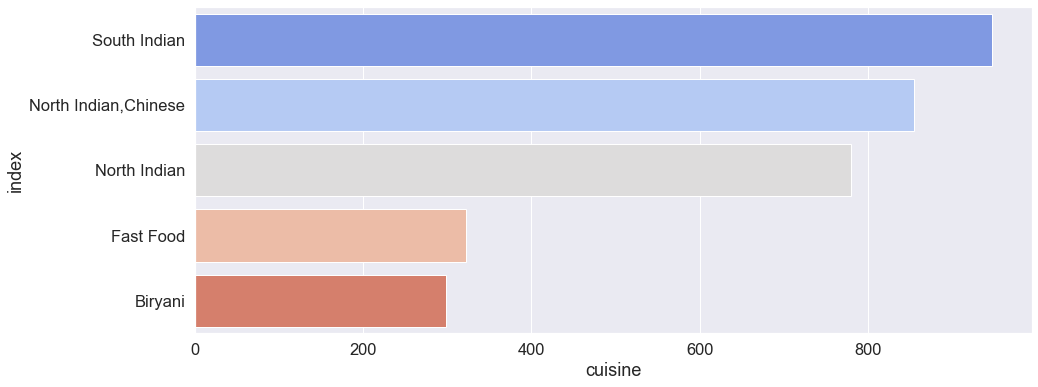

In [20]:
%matplotlib inline
sns.set(font_scale=1.5)
plt.figure(figsize=(15,6))
sns.barplot(x=top_cuisine["cuisine"],y=top_cuisine["index"],palette="coolwarm")
plt.show()

### Average price of each cuisines 

In [21]:
mean_price=[]
for i in top_cuisine["index"].to_list():
    avg_price=data[data["cuisine"]==i]["price"].mean()
    mean_price.append(avg_price)
mean_price_data=pd.DataFrame(top_cuisine["index"])
mean_price_data["avg_price"]=mean_price
mean_price_data.rename(columns={"index":"cuisine"},inplace=True)
    


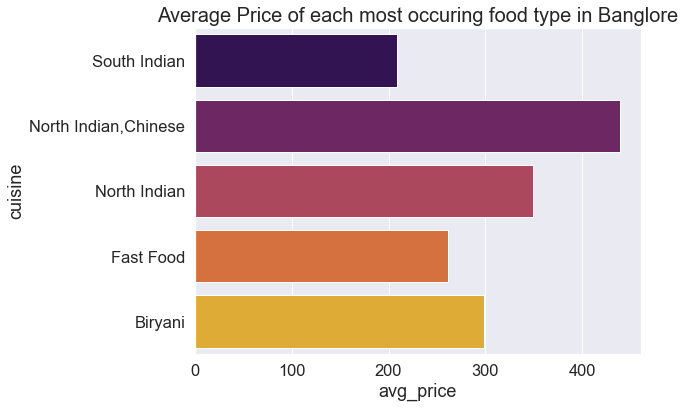

In [22]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8,6))
plt.title("Average Price of each most occuring food type in Banglore",fontdict={'fontsize':20})
sns.barplot(x=mean_price_data["avg_price"],y=mean_price_data["cuisine"],palette="inferno")
plt.show()

### Distribution of price with respect to customer ratings

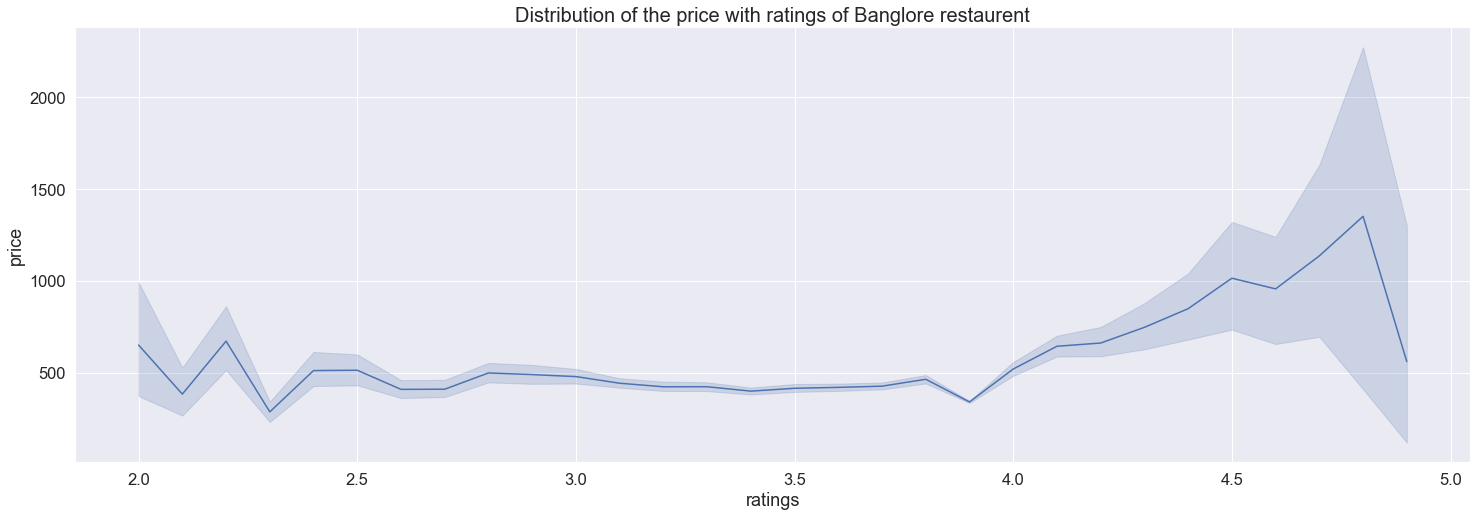

In [23]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25,8))
plt.title("Distribution of the price with ratings of Banglore restaurent",fontdict={'fontsize':20})
sns.lineplot(y=data["price"],x=data["ratings"])
plt.show()

### We can see the sudden rice in  pirce as soon as we cross the ratings of 4.0 , this shows the normal aspects of business i.e Quality demands Pricing.  

### Top Ten Restaurents with respect different Cuisines

In [24]:
top_restaurent=pd.DataFrame()
new_temp=pd.DataFrame()
for i in mean_price_data["cuisine"]:
    temp=data[data["cuisine"]==i]
    print("Top Restaurents for",i.upper(),"(according to ratings)")
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print(temp[temp["ratings"]>4.0]["name"][:10])
    print("---------------------------------------------------------------------------------------")
    

Top Restaurents for SOUTH INDIAN (according to ratings)
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
0                   Taaza Thindi
1           Brahmin's Coffee Bar
8                  Arogya Ahaara
13     Mavalli Tiffin Room (MTR)
23                CTR Shri Sagar
30        Sri Raghavendra Stores
36              S N Refreshments
41              Vidyarthi Bhavan
102             Puliyogare Point
113           Raghavendra Tiffin
Name: name, dtype: object
---------------------------------------------------------------------------------------
Top Restaurents for NORTH INDIAN,CHINESE (according to ratings)
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
108              2 Mum's Kitchen
174                   Nakkshatra
390    Chapati Master-By Kevin's
482                      Parivar
593                     Sathya's
637               The Purple Pan
683           New Agarwal Bhavan
731                   Al-Sidiqu

### Most occuring food tags

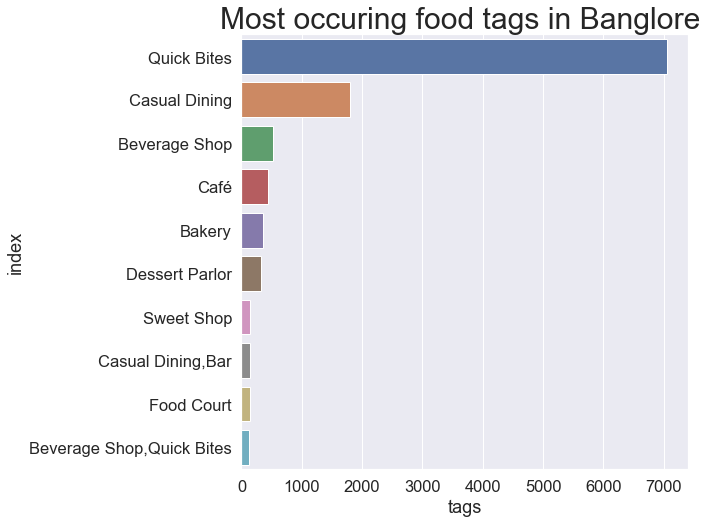

In [25]:
plt.figure(figsize=(8,8))
plt.title("Most occuring food tags in Banglore ",fontdict={"fontsize":30})
sns.set(font_scale=1.5)
sns.barplot(x="tags",y="index",data=data.tags.value_counts()[:10].reset_index())
plt.show()

### We can see that Quick bites are bangaloreans favorite options to have food.

### Price vs Ratings scatter plot

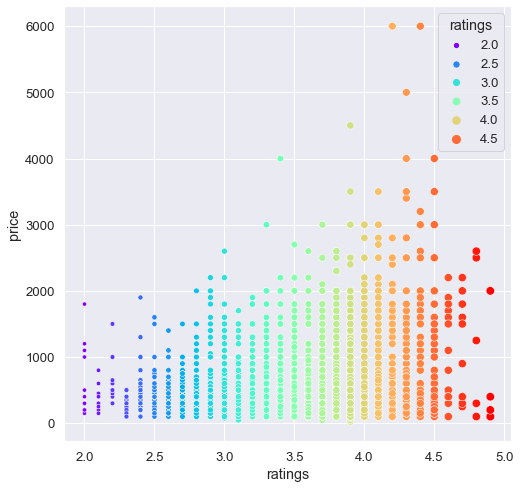

In [26]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
sns.scatterplot(y="price",x="ratings",data=data,hue=data["ratings"],size=data["ratings"],palette="rainbow")
plt.show()